## Expertensystem EDA

In [2]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Daten einlesen
df = pd.read_csv('data/hr_train.csv', sep=',', decimal='.')

In [5]:
df.shape

(10000, 11)

In [6]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,0.65,0.96,5,226,2,1,0,0,marketing,medium
1,1,0.88,0.80,3,166,2,0,0,0,IT,low
2,2,0.69,0.98,3,214,2,0,0,0,sales,low
3,3,0.41,0.47,2,154,3,0,1,0,sales,low
4,4,0.87,0.76,5,254,2,1,0,0,hr,low


In [7]:
df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

### Change column names

In [8]:
df.rename(columns={'average_montly_hours':'average_monthly_hours','Work_accident':'work_accident'},inplace=True)

### NULL-Werte prüfen

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
id                       10000 non-null int64
satisfaction_level       10000 non-null float64
last_evaluation          10000 non-null float64
number_project           10000 non-null int64
average_monthly_hours    10000 non-null int64
time_spend_company       10000 non-null int64
work_accident            10000 non-null int64
left                     10000 non-null int64
promotion_last_5years    10000 non-null int64
department               10000 non-null object
salary                   10000 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Datei enthält keine Spalten mit NULL-Werten. Keine dahingehende Datenbereinigung erforderlich.

### Ausprägungen der Spalten departement und salary überprüfen

In [10]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [11]:
df['department'].value_counts()

sales          2763
technical      1854
support        1495
IT              810
product_mng     601
marketing       586
RandD           509
hr              505
accounting      502
management      375
Name: department, dtype: int64

In [12]:
df['salary'].value_counts()

low       4912
medium    4274
high       814
Name: salary, dtype: int64

In [13]:
for col in df.select_dtypes(include=[np.object]):
    print('transforming', col)
    df[col] = df[col].astype('category')

transforming department
transforming salary


In [14]:
df.dtypes

id                          int64
satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
time_spend_company          int64
work_accident               int64
left                        int64
promotion_last_5years       int64
department               category
salary                   category
dtype: object

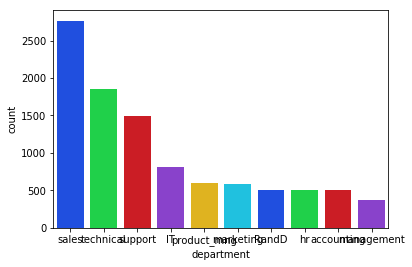

In [15]:
sns.countplot(x='department', data=df, palette='bright', order=df['department'].value_counts().index);

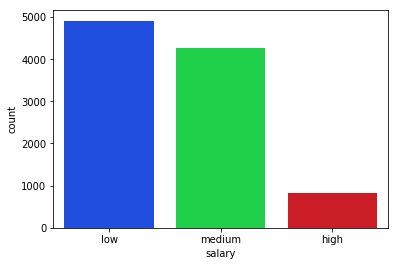

In [16]:
sns.countplot(x='salary', data=df, palette='bright', order=df['salary'].value_counts().index);

Einheitliche Schreibweisen vorhanden. Keine Korrekturen notwendig.
Keine Ausreiser bei der Verteilung der Attribut-Ausprägungen.

### Numerische Attribute betrachten

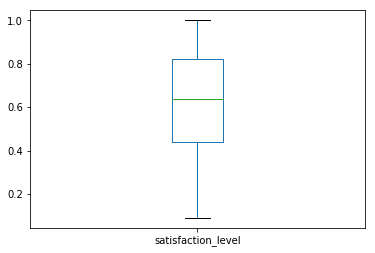

In [17]:
df['satisfaction_level'].plot.box();

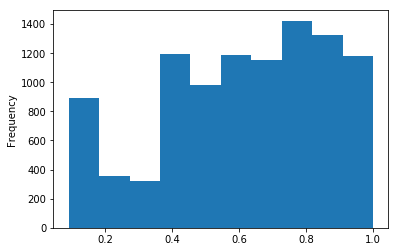

In [18]:
df['satisfaction_level'].plot.hist();

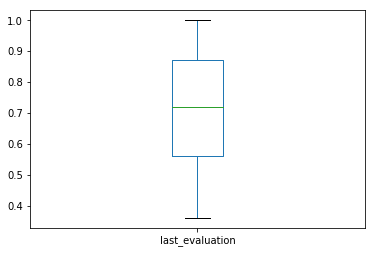

In [19]:
df['last_evaluation'].plot.box();

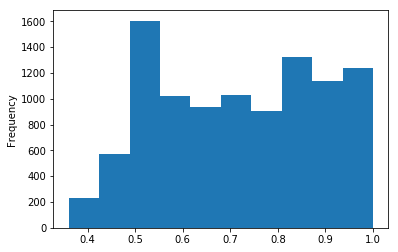

In [20]:
df['last_evaluation'].plot.hist();

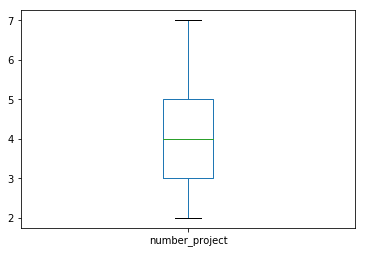

In [21]:
df['number_project'].plot.box();

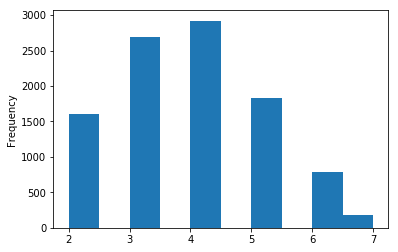

In [22]:
df['number_project'].plot.hist()

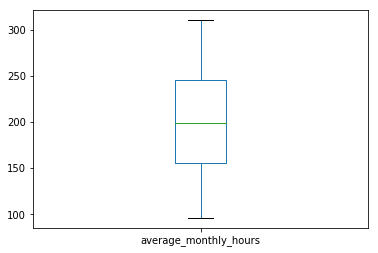

In [23]:
df['average_monthly_hours'].plot.box();

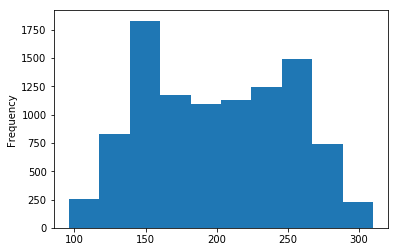

In [24]:
df['average_monthly_hours'].plot.hist();

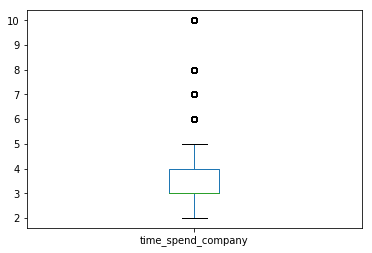

In [25]:
df['time_spend_company'].plot.box();

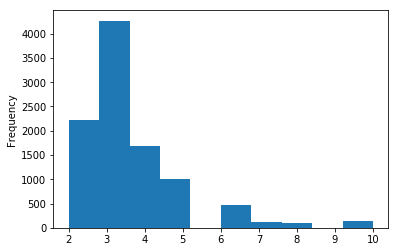

In [26]:
df['time_spend_company'].plot.hist();

Menge der Person mit 10 Jahren im Unternehmen ist ausreichend groß, so dass diese Zielgruppe nicht als Ausreiser betrachtet werden kann. Keine Anpassung der Daten erfordlich.

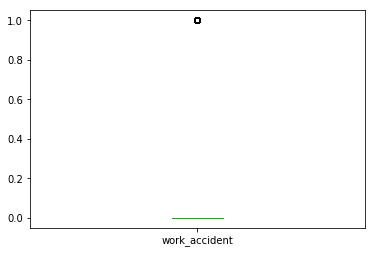

In [27]:
df['work_accident'].plot.box();

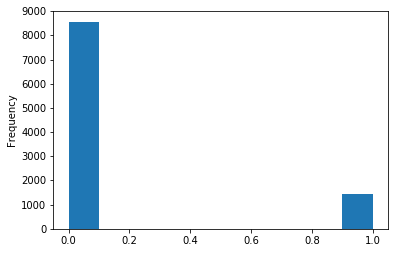

In [28]:
df['work_accident'].plot.hist();

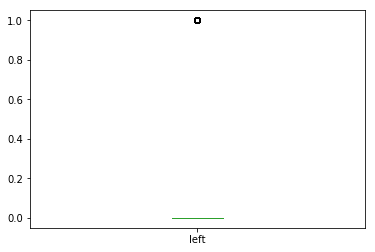

In [29]:
df['left'].plot.box();

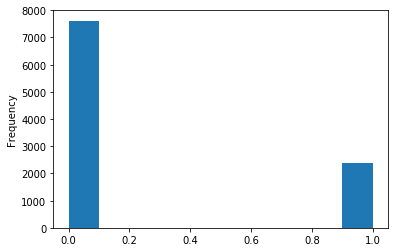

In [30]:
df['left'].plot.hist();

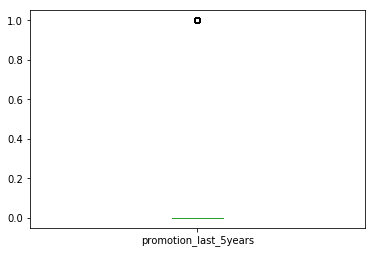

In [31]:
df['promotion_last_5years'].plot.box();

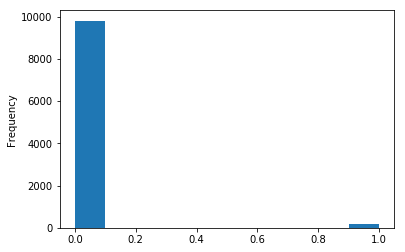

In [32]:
df['promotion_last_5years'].plot.hist();

Daten wirken valide. Keine Bereinigung der Daten erforderlich.

In [33]:
# geprüftes DataFrame (Trainingsdaten) sichern 
df.to_pickle('data/hr_train_clean.pkl')

### Bivariante Zusammenhänge

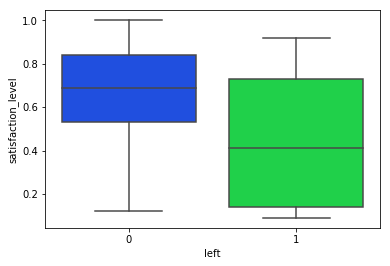

In [34]:
sns.boxplot(x='left', y='satisfaction_level', data=df, palette='bright');

 MA mit einer Zufriedenheit höher ca. 90% verlassen das Unternehmen anscheinend nicht.

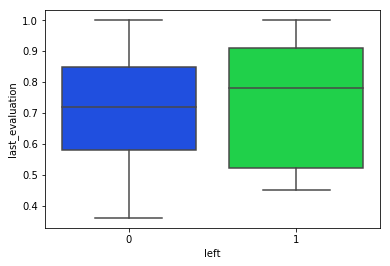

In [35]:
sns.boxplot(x='left', y='last_evaluation', data=df, palette='bright');

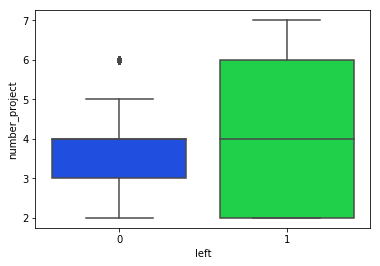

In [36]:
sns.boxplot(x='left', y='number_project', data=df, palette='bright');

Anscheinend verlassen Mitarbeiter mit 7 Projekten das Unternehmen immer. Außerdem die meisten Mitarbeiter mit 6 Projekten.

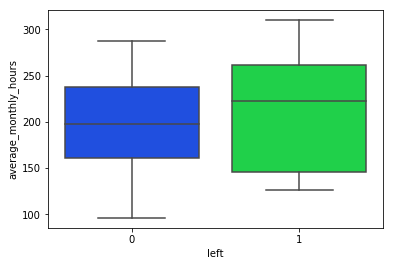

In [37]:
sns.boxplot(x='left', y='average_monthly_hours', data=df, palette='bright');

Anscheinend verlassen MA mit ca. 280 Stunden oder mehr das Unternehmen eher.
Gleichzeitig bleiben MA mit weniger als 130 Stunden immer im Unternehmen.

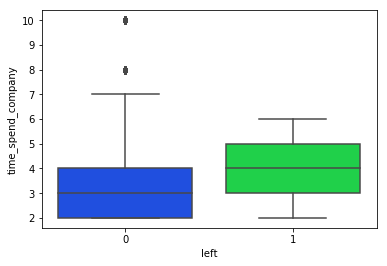

In [38]:
sns.boxplot(x='left', y='time_spend_company', data=df, palette='bright');

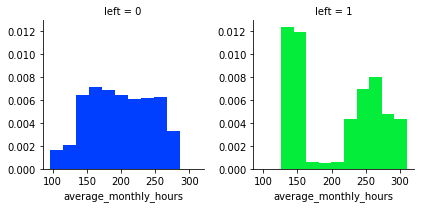

In [50]:
fg = sns.FacetGrid(data=df, col='left', hue='left', palette='bright')
fg.map(plt.hist, 'average_monthly_hours', bins=10, normed=True);

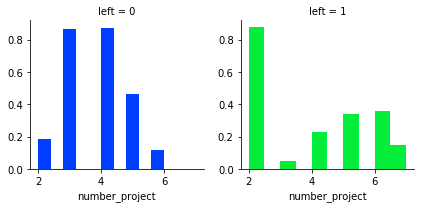

In [51]:
fg = sns.FacetGrid(data=df, col='left', hue='left', palette='bright')
fg.map(plt.hist, 'number_project', bins=10, normed=True);

In [ ]:
sns.lmplot(x='number_project', y='K', hue='Drug', data=df, palette='bright', fit_reg=False);

### Analyse nicht numerische Attribute

In [40]:
ct = pd.crosstab(df['salary'], df['left'])
ct

left,0,1
salary,,
high,756,58
low,3451,1461
medium,3408,866


In [41]:
ct = pd.crosstab(df['department'], df['left'])
ct

left,0,1
department,,
IT,629,181
RandD,432,77
accounting,376,126
hr,361,144
management,317,58
marketing,454,132
product_mng,468,133
sales,2093,670
support,1112,383


### Analyse Abhängigkeiten

In [42]:
def ccc(ct):
    chi2 = stats.chi2_contingency(ct)[0]
    q = min(ct.shape)
    if q>1:
        return np.sqrt(chi2/(chi2+ct.values.sum()))*np.sqrt(q/(q-1))
    else:
        return 0

In [43]:
ccc(pd.crosstab((df['salary']), df['left']))

0.22069073523964494

In [44]:
ccc(pd.crosstab((df['department']), df['left']))

0.10187464057856438

In [45]:
ccc(pd.crosstab((df['promotion_last_5years']), df['left']))

0.081844127049716817

In [46]:
ccc(pd.crosstab((df['work_accident']), df['left']))

0.21981953677159377

In [47]:
ccc(pd.crosstab((df['time_spend_company']), df['left']))

0.49632509213494236

In [48]:
ccc(pd.crosstab((df['average_monthly_hours']), df['left']))

0.63037653499414914

In [49]:
ccc(pd.crosstab((df['number_project']), df['left']))

0.71949678263398087

In [48]:
ccc(pd.crosstab((df['last_evaluation']), df['left']))

0.53973201169220597

In [49]:
ccc(pd.crosstab((df['satisfaction_level']), df['left']))

0.82929308418511993